In [1]:
%matplotlib notebook

import pandas as pd
import yfinance as yf
import mplfinance as mf
import numpy as np
import matplotlib.pyplot as plt
from ta.trend import ADXIndicator
from indicator_funcs import sma, backtesting, buysell, ema, macd, rsi, in_squeeze, ttm, adx_indicator, dx 
from processData import grabTickers, parse_file, grabDataPaths, grabData
import xlrd
from datetime import datetime



In [2]:
today = pd.Timestamp('today')
xle = yf.download( 'XLE',
                        start = '2020-01-01',
                        end = today,
                        progress = False)

macd(xle)
rsi(xle)
ttm(xle)
adx_indicator(xle)



/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Open,Adj High,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,54.150002,55.220001,54.009998,55.160000,51.172787,24430500,56.997673,1,54.330744,1,...,50.235796,51.228451,50.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-01-31,54.230000,54.380001,53.160000,53.439999,49.577118,33430500,56.450339,1,16.058357,0,...,50.310014,50.449173,49.317359,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-03,53.369999,53.450001,52.549999,52.740002,48.927715,21289200,55.879518,1,15.384585,0,...,49.512173,49.586392,48.751447,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-04,53.500000,53.919998,52.830002,52.930000,49.103981,19819800,55.425746,1,7.279650,0,...,49.632779,50.022417,49.011211,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2020-02-05,53.810001,55.110001,53.779999,54.919998,50.950134,34382000,55.347938,1,75.694495,1,...,49.920373,51.126402,49.892539,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,49.959999,50.880001,49.799999,50.750000,50.750000,22870000,0.212991,1,60.000000,1,...,49.959999,50.880001,49.799999,27.255602,19.643846,15.236256,27.255602,19.643846,0,0
2021-05-04,50.849998,51.230000,50.200001,50.779999,50.779999,26958800,0.327872,1,52.059938,1,...,50.849998,51.230000,50.200001,27.652667,18.483989,15.567443,27.652667,18.483989,0,0
2021-05-05,51.410000,52.580002,51.410000,52.419998,52.419998,23462100,0.544969,1,100.000000,1,...,51.410000,52.580002,51.410000,32.387807,16.635431,16.750659,32.387807,16.635431,0,0


<IPython.core.display.Javascript object>


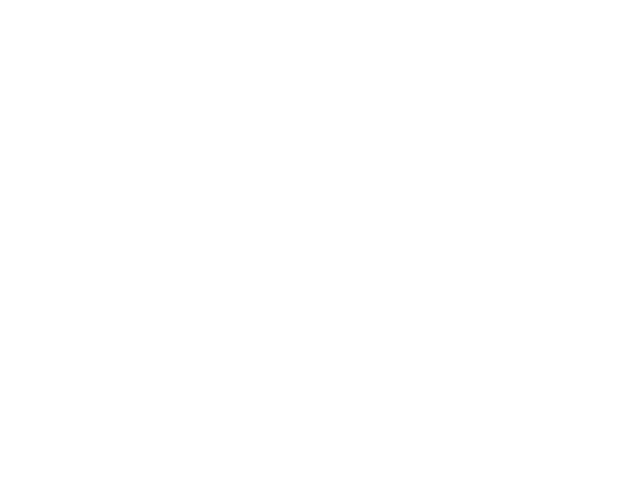

In [3]:
plt.close()
plt.plot(xle['rsi_indicator']+xle['adx_indicator']+xle['ttm_indicator']+xle['macd_indicator'])
plt.show()

In [4]:
tickers = grabTickers('tickersymbs.txt')
today = pd.Timestamp('today')


for n in range(0,10):
    globals()[tickers[n]] = yf.download(tickers[n],
                        start = '2020-01-01',
                        end = today,
                        progress = False)
    globals()[tickers[n]] = macd(globals()[tickers[n]])
    globals()[tickers[n]] = rsi(globals()[tickers[n]])
    globals()[tickers[n]] = ttm(globals()[tickers[n]])
    globals()[tickers[n]] = adx_indicator(globals()[tickers[n]]) 
    
    file = xlrd.open_workbook(tickers[n]+'_Final.xls')
    sheet = file.sheet_by_name('Sheet1')
    VIX = []
    date = []
    buy_sell = []
    dates_buy = []
    dates_sell = []
    
    # Get Data from Files
    for i in range(0,sheet.nrows):
        VIX.append(sheet.cell_value(i, 1))
        d = xlrd.xldate_as_datetime(sheet.cell_value(i, 0), 0)
        date.append(d.strftime("%Y-%m-%d"))

    d = dx(VIX)
    d = sma(d,4)
    for k in range(4,len(d)):
        if(d[k] > 0):
            buy_sell.append(0)
            dates_buy.append(date[k])
        else:
            buy_sell.append(1)
            dates_sell.append(date[k])

    temp = np.zeros(len(globals()[tickers[n]])-len(VIX))
    temp2 = np.zeros(len(globals()[tickers[n]])-len(buy_sell))
    
    VIX = np.append(temp,VIX)
    indicator = np.append(temp2,buy_sell)

    globals()[tickers[n]]['vix'] = VIX
    globals()[tickers[n]]['vix_indicator'] = indicator

/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/home/crmartin/.local/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [5]:
XLI


,Open,High,Low,Close,Adj Close,Volume,macd,macd_indicator,rsi,rsi_indicator,...,Adj Low,pos_directional_indicator,neg_directional_indicator,adx,di_pos,di_neg,trend_signal,adx_indicator,vix,vix_indicator
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,82.139999,83.120003,81.970001,83.029999,81.122276,13158200,83.051919,1,100.000000,1,...,80.086634,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-01-31,82.580002,82.699997,80.800003,81.110001,79.246391,19083600,82.753162,1,21.632630,0,...,78.943516,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-03,81.550003,82.230003,80.989998,81.080002,79.217087,15676600,82.495753,1,4.411600,0,...,79.129151,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-04,82.320000,82.809998,82.239998,82.610001,80.711922,13597200,82.513329,1,43.965536,0,...,80.350420,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
2020-02-05,83.540001,84.000000,83.110001,83.989998,82.060226,12835800,82.740509,1,98.979632,1,...,81.200448,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,102.699997,103.260002,102.320000,102.980003,102.980003,9445300,1.399654,1,72.244937,1,...,102.320000,29.015419,14.420150,24.164515,29.015419,14.420150,0,0,69.20,1.0
2021-05-04,102.650002,103.449997,102.180000,103.430000,103.430000,11677400,1.444682,1,68.807330,1,...,102.180000,27.966681,13.344178,24.966783,27.966681,13.344178,0,0,59.72,1.0
2021-05-05,103.690002,104.019997,103.419998,103.529999,103.529999,5695800,1.471474,1,100.000000,1,...,103.419998,30.418417,12.856117,26.082260,30.418417,12.856117,1,1,62.00,0.0


In [6]:
tickers

['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

In [8]:
n = 5

weights = [0,0,0,0,4]
init_balance = 1000
backtesting(globals()[tickers[n]],weights,init_balance,3,0)
#XLE

-0.015909798585518047

<IPython.core.display.Javascript object>


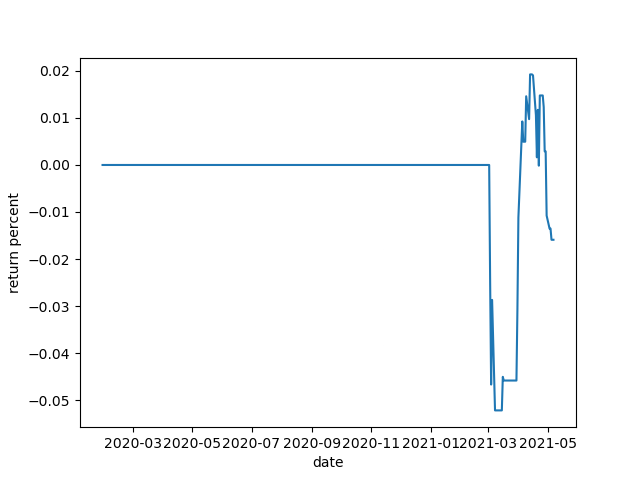

In [9]:
plt.close()
plt.plot(globals()[tickers[n]]['returns'])
plt.xlabel('date')
plt.ylabel('return percent')
#plt.plot(XLF['overall_indicator'])
plt.show()

In [30]:
import itertools
from itertools import zip_longest

init_balance = 1000

adx_weight = [1,2,3,4,5]
rsi_weight = [1,2,3,4,5]
ttm_weight = [1,2,3,4,5]
vix_weight = [1,2,3,4,5]
macd_weight = [1,2,3,4,5]
buy = [3,4,5]
sell = [0,1,2]

def optimize_weights(data,adx_weights,rsi_weights,ttm_weights,vix_weights,macd_weights,buy,sell):
    s = [adx_weights,rsi_weights,ttm_weights,vix_weights,macd_weights]
    permutations = list(itertools.product(*s))
    temp_returns = 0
    optimized_weight = [0,0,0,0,0]
    s2 = [buy,sell]
    permutations_buy_sell = list(itertools.product(*s2))
    optimized_buy_sell = [0,0]
    for buy_sell in permutations_buy_sell:
        for permutation in permutations:
            temp = backtesting(data,permutation,init_balance,buy_sell[0],buy_sell[1]) 
            if temp > temp_returns:
                temp_returns = temp
                optimized_weight = permutation
                optimized_buy_sell = buy_sell
    return optimized_weight,optimized_buy_sell

In [33]:
XLE_weights,XLE_b = optimize_weights(XLE,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLE_weights,XLE_b

((3, 1, 2, 1, 3), (3, 2))

In [34]:
XLC_weights,XLC_b = optimize_weights(XLC,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLC_weights,XLC_b 

((1, 1, 1, 1, 1), (3, 1))

In [ ]:
XLI_weights,XLI_b = optimize_weights(XLI,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLI_weights,XLI_b

In [ ]:
XLK_weights,XLK_b = optimize_weights(XLK,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLK_weights,XLK_b

In [ ]:
XLF_weights,XLF_b = optimize_weights(XLF,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLF_weights,XLF_b 

In [ ]:
XLB_weights,XLB_b = optimize_weights(XLB,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLB_weights,XLB_b

In [ ]:
XLV_weights,XLV_b = optimize_weights(XLV,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLV_weights,XLV_b

In [ ]:
XLY_weights,XLY_b = optimize_weights(XLY,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLY_weights,XLY_b

In [ ]:
XLU_weights,XLU_b = optimize_weights(XLU,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLU_weights,XLU_b

In [ ]:
XLP_weights,XLP_b = optimize_weights(XLP,adx_weight,rsi_weight,ttm_weight,vix_weight,macd_weight,buy,sell)
XLP_weights,XLP_b

In [ ]:
b[1]

In [15]:
tickers

['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']

<IPython.core.display.Javascript object>


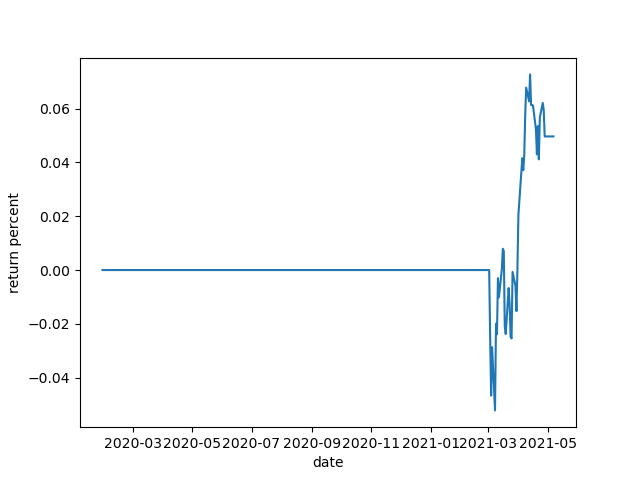

In [29]:
n = 5

backtesting(XLK,a,init_balance,b[0],b[1])
plt.close()
plt.plot(XLK['returns'])
plt.xlabel('date')
plt.ylabel('return percent')
#plt.plot(XLF['overall_indicator'])
plt.show()